In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\sharm\OneDrive\Documents\Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [4]:
# CONVERT " " INTO NaN  

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
# THEN DETECT NULL VALUES

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# DROP THEM

In [9]:
df = df.dropna(subset=["TotalCharges"])

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# TO CHANGE THE DATATYPE

In [11]:
import numpy as np
df["TotalCharges"] = df["TotalCharges"].astype(float)

C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\2897765280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"] = df["TotalCharges"].astype(float)


In [12]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype(bool)

C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\308089417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SeniorCitizen"] = df["SeniorCitizen"].astype(bool)


# CHECK DUPLICATES

In [13]:
duplicates = df[df.duplicated()]
duplicates

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# SKEWNESS

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64


C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\2758532309.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


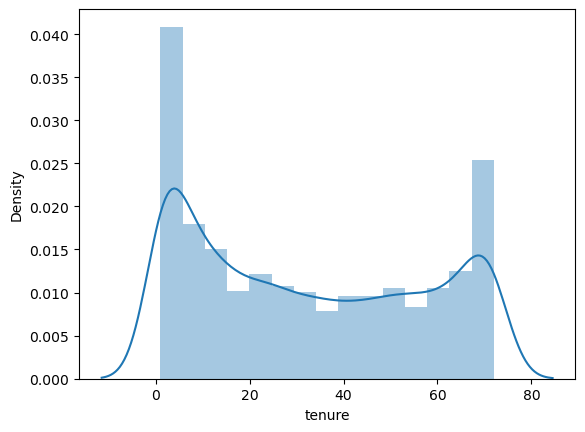

C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\2758532309.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


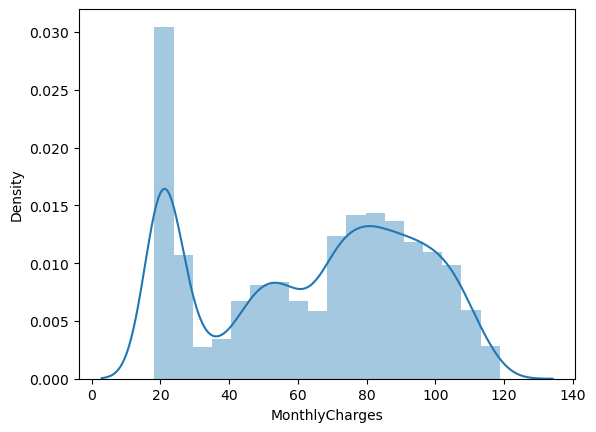

C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\2758532309.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


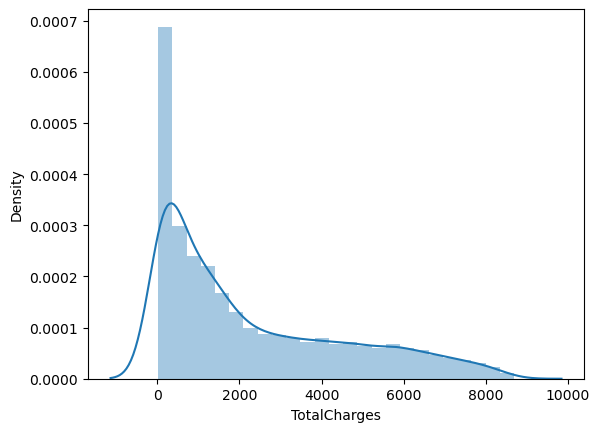

In [14]:
numeric_cols = df.select_dtypes(include="number").columns
print(df[numeric_cols].skew())

for col in numeric_cols:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

   

# OUTLIER DETECTION

In [15]:
cat_cols = df.select_dtypes(include='object').columns

In [16]:
z_scores = pd.DataFrame(stats.zscore(df[numeric_cols], nan_policy='omit'),
    columns=numeric_cols
)
outliers = np.abs(z_scores) > 3

outlier_summary = pd.DataFrame({
    'column': numeric_cols,
    'outlier_count': outliers.sum()
})

print(outlier_summary)

                        column  outlier_count
tenure                  tenure              0
MonthlyCharges  MonthlyCharges              0
TotalCharges      TotalCharges              0


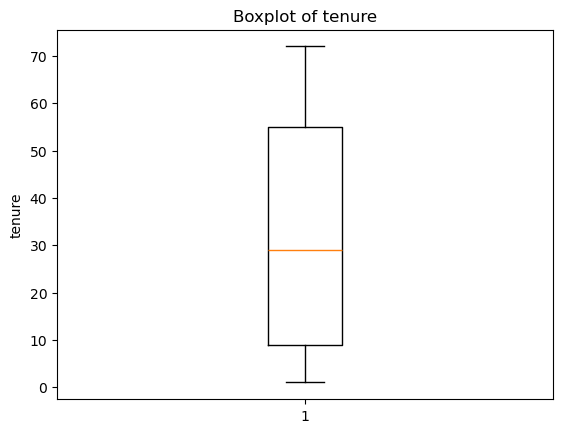

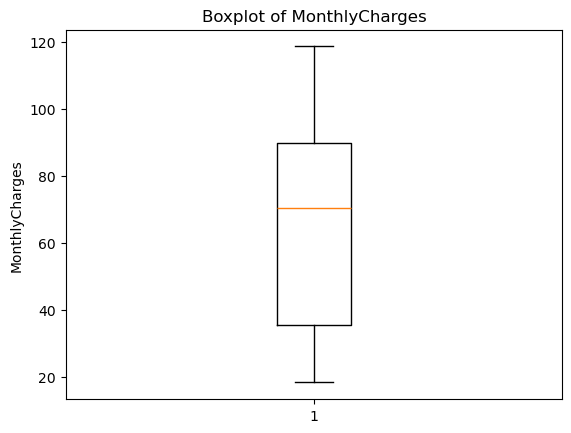

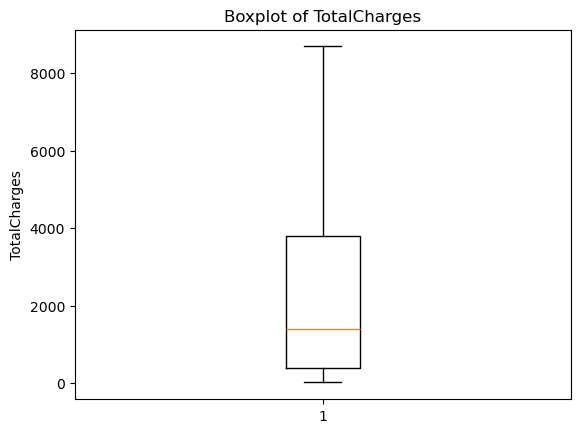

In [17]:
 for col in numeric_cols:
     plt.figure()
     plt.boxplot(df[col].dropna())
     plt.title(f'Boxplot of {col}')
     plt.ylabel(col)
     plt.show()


# Exploratory Data Analysis (EDA)

In [18]:
gender_dis = df['gender'].value_counts()
gender_dis

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [19]:
# CHURN DISTRIBUTION

In [20]:
churn_per = df['Churn'].value_counts(normalize = True) * 100
churn_per

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

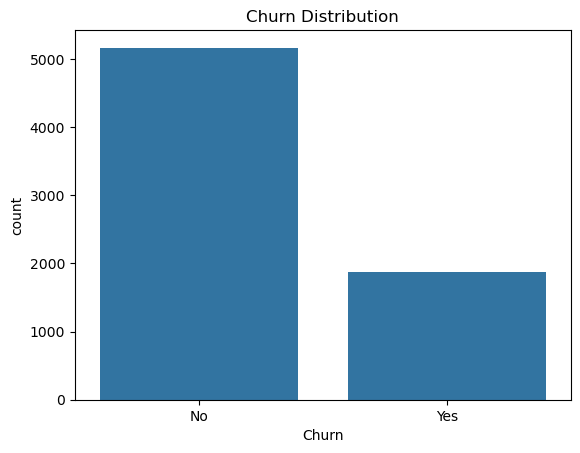

In [21]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [22]:
df.groupby('Churn')['SeniorCitizen'].mean()

Churn
No     0.128995
Yes    0.254682
Name: SeniorCitizen, dtype: float64

In [23]:
# REPLACING

In [24]:
cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Partner','Dependents']

df[cols] = df[cols].replace({
    'Yes': 1,
    'No': 0,
    'No internet service': 0
})


C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\1538415810.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace({
C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\1538415810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].replace({


In [25]:
# we cannot perform label encoder becouse these columns do have do NOT have an order

In [26]:
df.groupby('Churn')[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']].mean()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
Churn,,,,
No,0.333140,0.368390,0.362774,0.335077
Yes,0.157838,0.279829,0.291600,0.165864


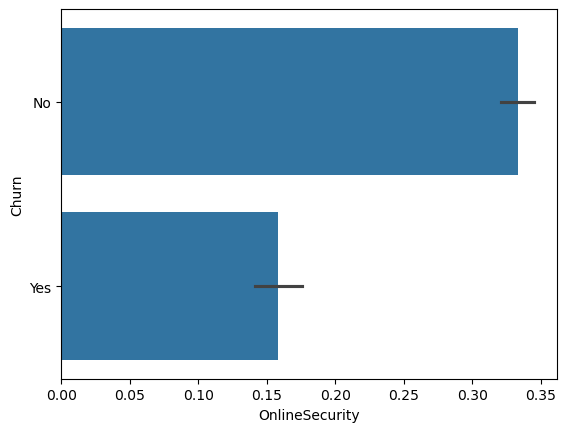

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='OnlineSecurity', y='Churn', data=df)
plt.show()

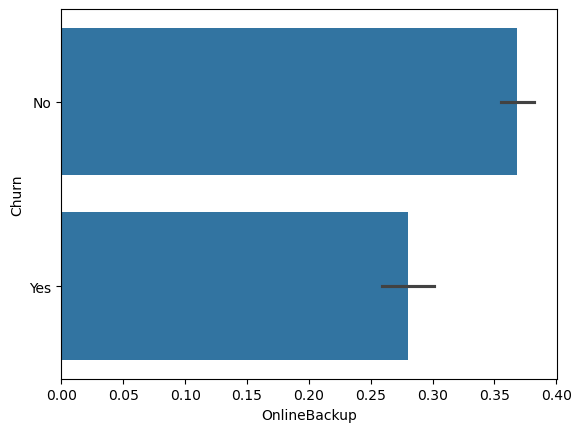

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='OnlineBackup', y='Churn', data=df)
plt.show()

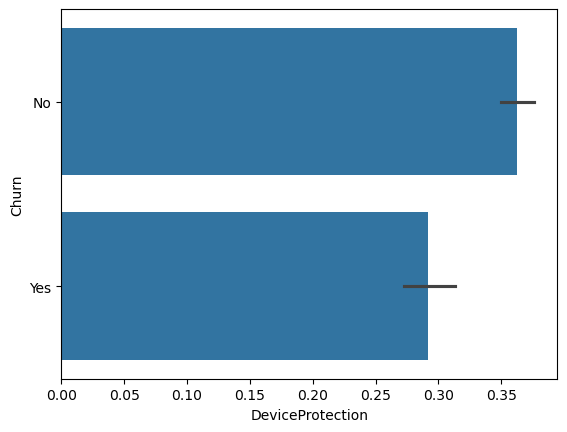

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='DeviceProtection', y='Churn', data=df)
plt.show()

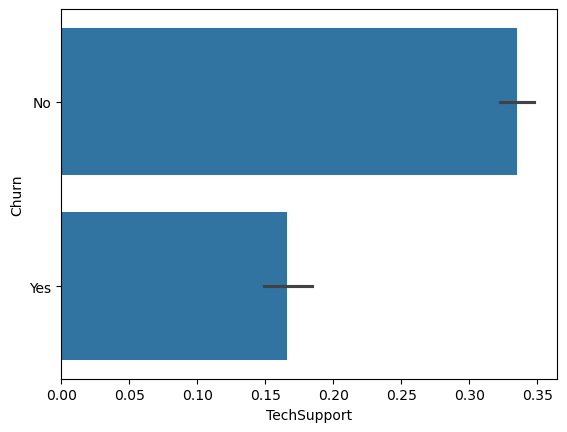

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='TechSupport', y='Churn', data=df)
plt.show()

In [31]:
cols = ['StreamingTV','StreamingMovies']

df[cols] = df[cols].replace({
    'Yes' : 1,
    'No'  : 0,
    'No internet service': 0
})

C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\641617883.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace({
C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\641617883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].replace({


In [32]:
df.groupby('Churn')[['StreamingTV','StreamingMovies']].mean()

,StreamingTV,StreamingMovies
Churn,,
No,0.365873,0.370521
Yes,0.435527,0.437667


In [33]:
pd.crosstab(df['InternetService'], df['Churn'], normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No,0.925658,0.074342


In [34]:
df.groupby('Churn')['tenure'].mean()

Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64

In [35]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [36]:
pd.crosstab(df['Partner'], df['Churn'], normalize='index')

Churn,No,Yes
Partner,,
0,0.670239,0.329761
1,0.802829,0.197171


In [37]:
pd.crosstab(df['Dependents'],df['Churn'],normalize = 'index')

Churn,No,Yes
Dependents,,
0,0.687209,0.312791
1,0.844688,0.155312


In [38]:
pd.crosstab(df['Partner'], df['Churn'], normalize='index')

Churn,No,Yes
Partner,,
0,0.670239,0.329761
1,0.802829,0.197171


# Chi-Square Test of Independence.

In [39]:
# H₀: (Contract type has no effect on churn.)
# H₁: (Contract type does affect churn.)
import pandas as pd
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency)

print('p-value', p)
print("Chi2 statistic:", chi2)

p-value 7.326182186265472e-257
Chi2 statistic: 1179.5458287339445


In [40]:
import numpy as np
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)
n = contingency.values.sum()

cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
print(cramers_v)


0.4095604189089921


In [41]:
# contract does have an impact on churn 

In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

# create contingency table
contingency = pd.crosstab(df['PaymentMethod'], df['Churn'])

# perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi2 statistic:", chi2)
print("p-value:", p)


Chi2 statistic: 645.4299001234638
p-value: 1.4263098511063342e-139


In [43]:
import numpy as np
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)
n = contingency.values.sum()

cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
print(cramers_v)

0.30295987245491557


In [44]:
# moderate impact

In [45]:
from scipy.stats import chi2_contingency
import pandas as pd

features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for feature in features:
    contingency = pd.crosstab(df[feature], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Feature: {feature}")
    print("Chi2:", chi2, "p-value:", p)
    if p < 0.05:
        print("Significant: affects churn\n")
    else:
        print("Not significant: does NOT affect churn\n")


Feature: OnlineSecurity
Chi2: 205.41578737378245 p-value: 1.37424000884718e-46
Significant: affects churn

Feature: OnlineBackup
Chi2: 47.246659325881964 p-value: 6.259257129714726e-12
Significant: affects churn

Feature: DeviceProtection
Chi2: 30.49569910229676 p-value: 3.346074945648779e-08
Significant: affects churn

Feature: TechSupport
Chi2: 189.96675360285266 p-value: 3.2328683255491206e-43
Significant: affects churn



In [46]:
from scipy.stats import chi2_contingency
import pandas as pd

features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for feature in features:
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.values.sum()

    cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
    print(f"Feature: {feature}")
    print(f"Chi2: {chi2:.3f}")
    print(f"p-value: {p:.4f}")
    print(f"Cramér's V: {cramers_v:.3f}")
    print("-------------------------------------------------\n")

Feature: OnlineSecurity
Chi2: 189.967
p-value: 0.0000
Cramér's V: 0.164
-------------------------------------------------

Feature: OnlineBackup
Chi2: 189.967
p-value: 0.0000
Cramér's V: 0.164
-------------------------------------------------

Feature: DeviceProtection
Chi2: 189.967
p-value: 0.0000
Cramér's V: 0.164
-------------------------------------------------

Feature: TechSupport
Chi2: 189.967
p-value: 0.0000
Cramér's V: 0.164
-------------------------------------------------



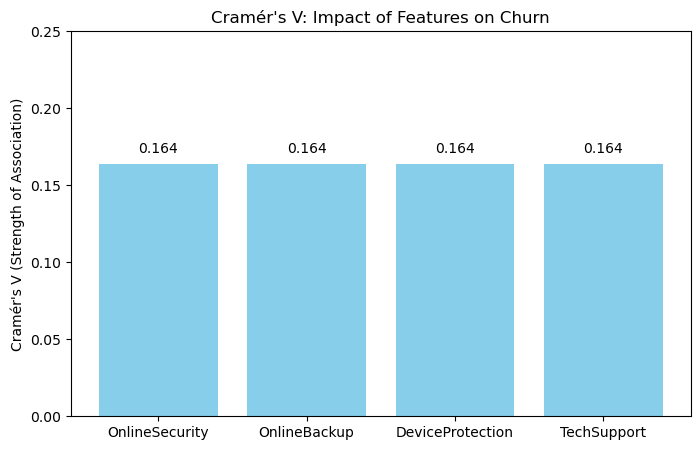

In [47]:
import matplotlib.pyplot as plt

features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
cramers_v = [0.164, 0.164, 0.164, 0.164]

plt.figure(figsize=(8,5))
bars = plt.bar(features, cramers_v, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.3f}", ha='center', va='bottom')

plt.ylim(0, 0.25)  
plt.title("Cramér's V: Impact of Features on Churn")
plt.ylabel("Cramér's V (Strength of Association)")
plt.show()


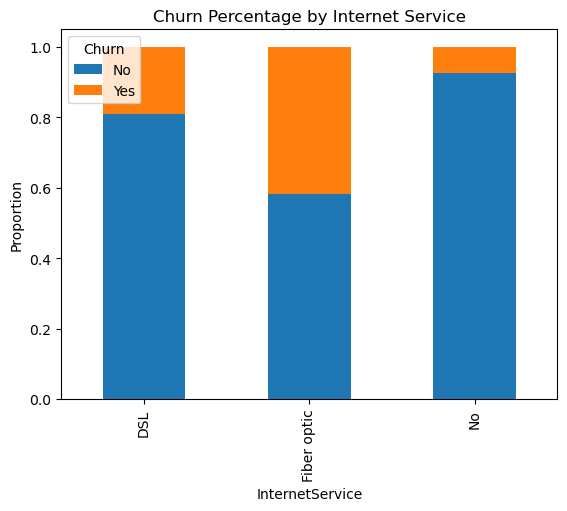

In [48]:
churn_pct = (
    df.groupby('InternetService')['Churn']
      .value_counts(normalize=True)
      .unstack()
)

churn_pct.plot(kind='bar', stacked=True)
plt.title("Churn Percentage by Internet Service")
plt.ylabel("Proportion")
plt.show()


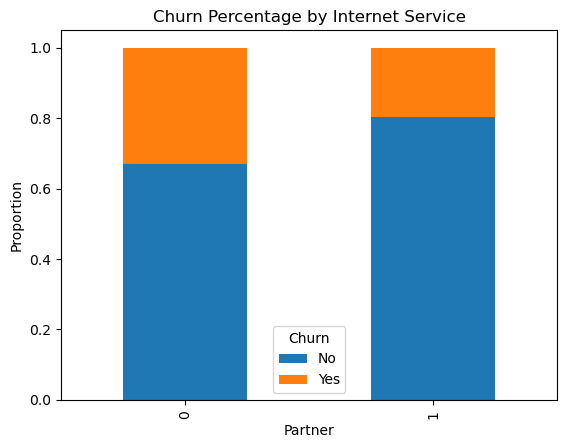

In [49]:
churn_pct = (
    df.groupby('Partner')['Churn']
      .value_counts(normalize=True)
      .unstack()
)

churn_pct.plot(kind='bar', stacked=True)
plt.title("Churn Percentage by Internet Service")
plt.ylabel("Proportion")
plt.show()


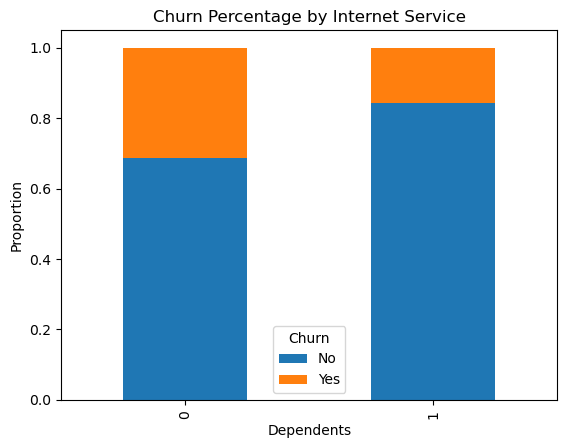

In [50]:
churn_pct = (
    df.groupby('Dependents')['Churn']
      .value_counts(normalize=True)
      .unstack()
)

churn_pct.plot(kind='bar', stacked=True)
plt.title("Churn Percentage by Internet Service")
plt.ylabel("Proportion")
plt.show()

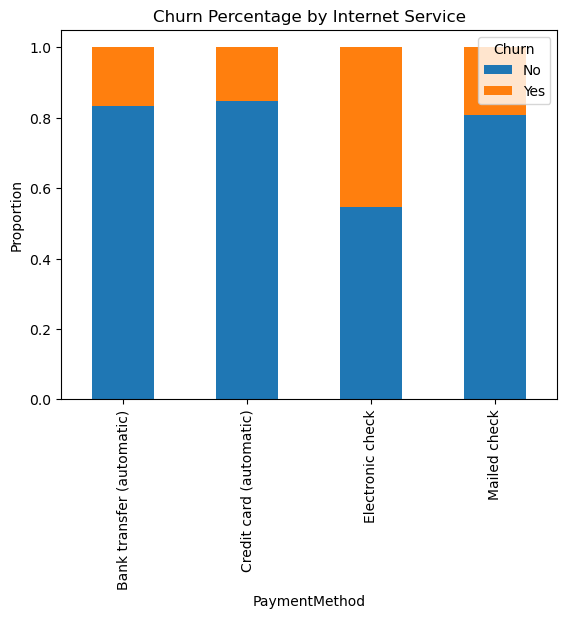

In [51]:
churn_pct = (
    df.groupby('PaymentMethod')['Churn']
      .value_counts(normalize=True)
      .unstack()
)

churn_pct.plot(kind='bar', stacked=True)
plt.title("Churn Percentage by Internet Service")
plt.ylabel("Proportion")
plt.show()

In [52]:
df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})

C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\3933311286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [53]:
df.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean()

,MonthlyCharges,TotalCharges
Churn,,
No,61.307408,2555.344141
Yes,74.441332,1531.796094


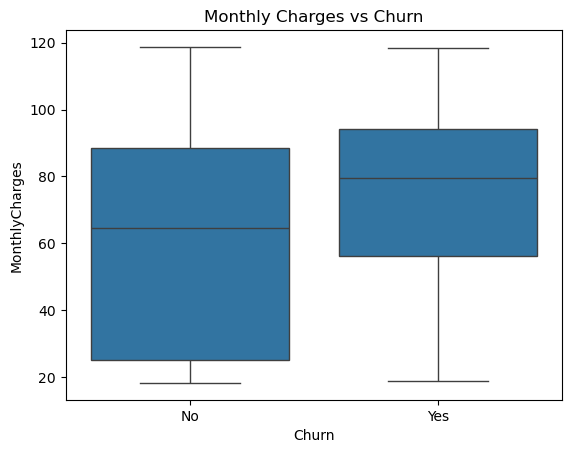

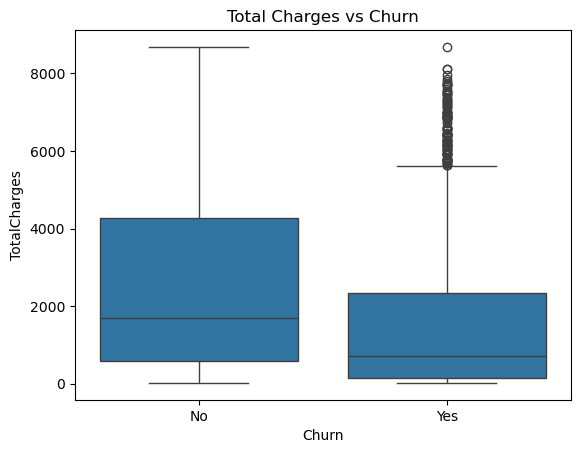

In [54]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()


# T-TEST

In [55]:
from scipy.stats import ttest_ind
from scipy import stats
churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no  = df[df['Churn'] == 'No']['MonthlyCharges']

t_stat, p_value = ttest_ind(churn_yes, churn_no, equal_var=False)

print("MonthlyCharges p-value:", p_value)


MonthlyCharges p-value: 2.6573571445160277e-72


In [56]:
from scipy.stats import ttest_ind
from scipy import stats
churn_yes = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no  = df[df['Churn'] == 'No']['TotalCharges']

t_stat, p_value = ttest_ind(churn_yes, churn_no, equal_var=False)

print("MonthlyCharges p-value:", p_value)

MonthlyCharges p-value: 1.1524944112838114e-75


In [57]:
import pandas as pd

result = (
    df.groupby('customerID', as_index=False)
      .agg({
          'Contract': 'first',
          'Churn': 'first'
      })
)

print(result)


      customerID        Contract Churn
0     0002-ORFBO        One year    No
1     0003-MKNFE  Month-to-month    No
2     0004-TLHLJ  Month-to-month   Yes
3     0011-IGKFF  Month-to-month   Yes
4     0013-EXCHZ  Month-to-month   Yes
...          ...             ...   ...
7027  9987-LUTYD        One year    No
7028  9992-RRAMN  Month-to-month   Yes
7029  9992-UJOEL  Month-to-month    No
7030  9993-LHIEB        Two year    No
7031  9995-HOTOH        Two year    No

[7032 rows x 3 columns]


In [60]:
churn_by_contract = (
    df.groupby('Contract')['Churn']
      .value_counts(normalize=True)
      .rename('Rate')
      .reset_index()
)

churn_by_contract[churn_by_contract['Churn'] == 'Yes']


,Contract,Churn,Rate
1,Month-to-month,Yes,0.427097
3,One year,Yes,0.112772
5,Two year,Yes,0.028487


In [61]:
# Month-to-month customers churn much more
# Long contracts strongly reduce churn

In [62]:
df.groupby(pd.cut(df['tenure'], bins=[0,12,24,48,72]))['Churn'] \
  .value_counts(normalize=True)


C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\929572913.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['tenure'], bins=[0,12,24,48,72]))['Churn'] \


tenure    Churn
(0, 12]   No       0.523218
          Yes      0.476782
(12, 24]  No       0.712891
          Yes      0.287109
(24, 48]  No       0.796110
          Yes      0.203890
(48, 72]  No       0.904868
          Yes      0.095132
Name: proportion, dtype: float64

In [63]:
# Customers in first 0–12 months churn the most
# Loyalty builds over time

In [64]:
df.groupby('PaymentMethod')['Churn'] \
  .value_counts(normalize=True)


PaymentMethod              Churn
Bank transfer (automatic)  No       0.832685
                           Yes      0.167315
Credit card (automatic)    No       0.847469
                           Yes      0.152531
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.807980
                           Yes      0.192020
Name: proportion, dtype: float64

In [65]:
df.groupby(pd.qcut(df['MonthlyCharges'], 4))['Churn'] \
  .value_counts(normalize=True)


C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\960143197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['MonthlyCharges'], 4))['Churn'] \


MonthlyCharges    Churn
(18.249, 35.588]  No       0.886803
                  Yes      0.113197
(35.588, 70.35]   No       0.754117
                  Yes      0.245883
(70.35, 89.862]   No       0.624501
                  Yes      0.375499
(89.862, 118.75]  No       0.671217
                  Yes      0.328783
Name: proportion, dtype: float64

In [66]:
# Customers paying more are more likely to churn

In [67]:
df.groupby('InternetService')['Churn'] \
  .value_counts(normalize=True)


InternetService  Churn
DSL              No       0.810017
                 Yes      0.189983
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925658
                 Yes      0.074342
Name: proportion, dtype: float64

In [68]:
# Possibly due to pricing or service quality

In [69]:
df.groupby('TechSupport')['Churn'] \
  .value_counts(normalize=True)

TechSupport  Churn
0            No       0.687700
             Yes      0.312300
1            No       0.848039
             Yes      0.151961
Name: proportion, dtype: float64

In [70]:
# Customers without support/security churn more

# Data Preparation

In [71]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\4069049957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [72]:
features = [
    'tenure',
    'MonthlyCharges',
    'SeniorCitizen',
    'Contract',
    'PaymentMethod',
    'InternetService',
    'TechSupport',
    'OnlineSecurity'
]

model_df = df[features + ['Churn']]


In [73]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale]= scaler.fit_transform(df[cols_to_scale])

C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\561885927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_scale]= scaler.fit_transform(df[cols_to_scale])


In [74]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
5631,6542-LWGXJ,Male,False,1,0,0.028169,No,No phone service,DSL,0,...,0,0,0,Month-to-month,No,Mailed check,0.067164,0.006860,0,0
4015,8570-KLJYJ,Female,False,0,0,0.492958,Yes,Yes,DSL,1,...,0,0,0,One year,No,Mailed check,0.360199,0.216328,0,0
6372,6368-TZZDT,Male,False,1,1,0.042254,Yes,No,No,0,...,0,0,0,Two year,No,Credit card (automatic),0.012438,0.009006,0,0


# get dummies

In [75]:
model_df = pd.get_dummies(
    model_df,
    drop_first=True
)
model_df

,tenure,MonthlyCharges,SeniorCitizen,TechSupport,OnlineSecurity,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,1,29.85,False,0,0,0,False,False,False,True,False,False,False
1,34,56.95,False,0,1,0,True,False,False,False,True,False,False
2,2,53.85,False,0,1,1,False,False,False,False,True,False,False
3,45,42.30,False,1,1,0,True,False,False,False,False,False,False
4,2,70.70,False,0,0,1,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,False,1,1,0,True,False,False,False,True,False,False
7039,72,103.20,False,0,0,0,True,False,True,False,False,True,False
7040,11,29.60,False,0,1,0,False,False,False,True,False,False,False
7041,4,74.40,True,0,0,1,False,False,False,False,True,True,False


# Train–Test Split

In [76]:
from sklearn.model_selection import train_test_split

X = model_df.drop('Churn', axis=1)
y = model_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [77]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Classification Report

In [78]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1300
           1       0.63      0.52      0.57       458

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



# Accuracy of the Model

In [79]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7952218430034129


# Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[1159,  141],
       [ 219,  239]])

# Threshold

In [81]:
y_prob = model.predict_proba(X_test)[:,1]
y_pred_35 = (y_prob >= 0.35).astype(int)


In [82]:
feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

feature_importance

InternetService_Fiber optic              0.514406
SeniorCitizen                            0.347477
PaymentMethod_Electronic check           0.321494
MonthlyCharges                           0.014151
tenure                                  -0.032033
PaymentMethod_Mailed check              -0.079749
PaymentMethod_Credit card (automatic)   -0.127045
TechSupport                             -0.406709
OnlineSecurity                          -0.514362
InternetService_No                      -0.725702
Contract_One year                       -0.781749
Contract_Two year                       -1.306460
dtype: float64

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred_35)
print(classification_report(y_test, y_pred_35))
print(confusion_matrix(y_test, y_pred_35))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1300
           1       0.56      0.70      0.62       458

    accuracy                           0.78      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.80      0.78      0.78      1758

[[1046  254]
 [ 137  321]]


# Accuracy of the Model

In [84]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_35)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7775881683731513


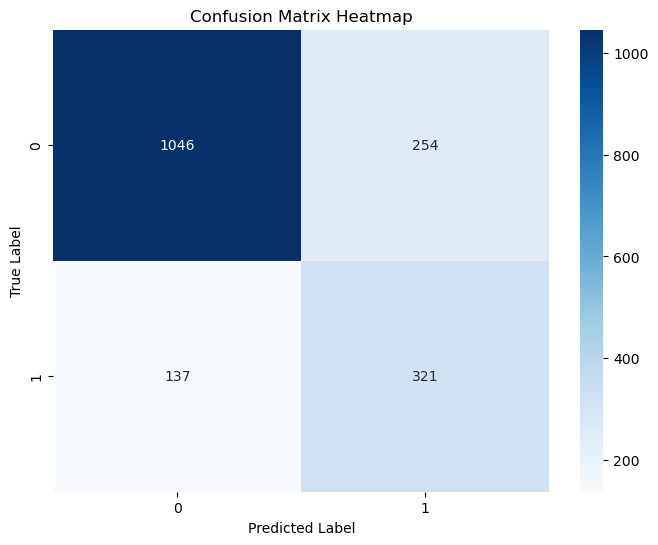

In [85]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_35)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [86]:
df['churn_probability'] = model.predict_proba(X)[:,1]


C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\2452097010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn_probability'] = model.predict_proba(X)[:,1]


In [87]:
df['risk_segment'] = pd.cut(
    df['churn_probability'],
    bins=[0, 0.35, 0.65, 1],
    labels=['Low', 'Medium', 'High']
)


C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\2835662067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk_segment'] = pd.cut(


In [88]:
feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

feature_importance


InternetService_Fiber optic              0.514406
SeniorCitizen                            0.347477
PaymentMethod_Electronic check           0.321494
MonthlyCharges                           0.014151
tenure                                  -0.032033
PaymentMethod_Mailed check              -0.079749
PaymentMethod_Credit card (automatic)   -0.127045
TechSupport                             -0.406709
OnlineSecurity                          -0.514362
InternetService_No                      -0.725702
Contract_One year                       -0.781749
Contract_Two year                       -1.306460
dtype: float64

In [89]:
feature_importance_df = feature_importance.reset_index()
feature_importance_df.columns = ['Feature', 'Coefficient']


In [90]:
churn_increase_df = feature_importance_df[
    feature_importance_df['Coefficient'] > 0
]

In [91]:
top5_churn_increase = churn_increase_df.sort_values(
    by='Coefficient',
    ascending=False
).head(5)


In [92]:
feature_importance_df

,Feature,Coefficient
0,InternetService_Fiber optic,0.514406
1,SeniorCitizen,0.347477
2,PaymentMethod_Electronic check,0.321494
3,MonthlyCharges,0.014151
4,tenure,-0.032033
5,PaymentMethod_Mailed check,-0.079749
6,PaymentMethod_Credit card (automatic),-0.127045
7,TechSupport,-0.406709
8,OnlineSecurity,-0.514362
9,InternetService_No,-0.725702


In [93]:
top5_churn_increase 

,Feature,Coefficient
0,InternetService_Fiber optic,0.514406
1,SeniorCitizen,0.347477
2,PaymentMethod_Electronic check,0.321494
3,MonthlyCharges,0.014151


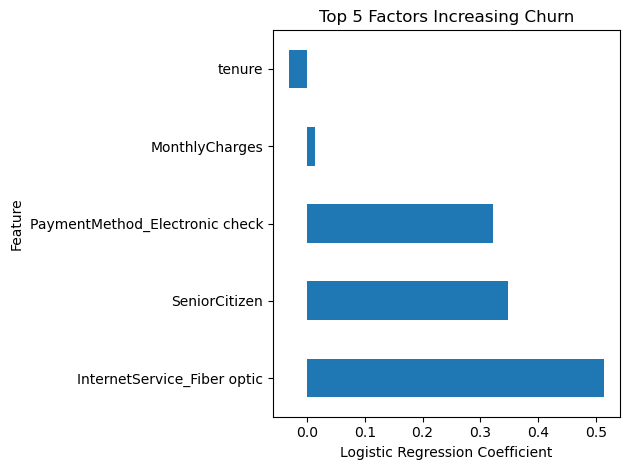

In [94]:
top_increase = feature_importance.head(5)
import matplotlib.pyplot as plt

plt.figure()
top_increase.plot(kind='barh')
plt.title('Top 5 Factors Increasing Churn')
plt.xlabel('Logistic Regression Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


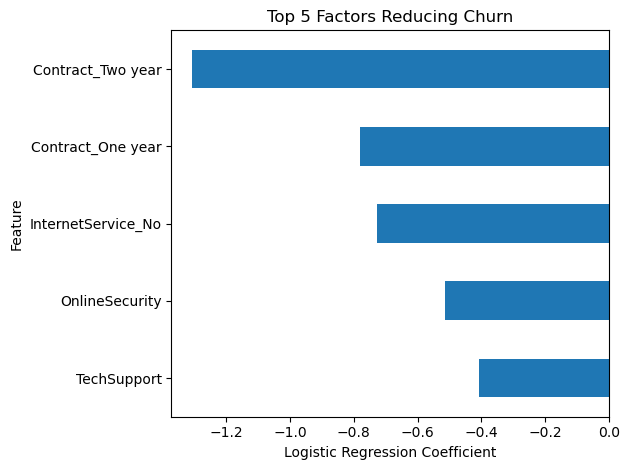

In [95]:
top_decrease = feature_importance.tail(5)
plt.figure()
top_decrease.plot(kind='barh')
plt.title('Top 5 Factors Reducing Churn')
plt.xlabel('Logistic Regression Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [96]:
df['churn_probability'] = model.predict_proba(X)[:, 1]
df['churn_risk_score'] = (df['churn_probability'] * 100).round(1)

C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\2805354057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn_probability'] = model.predict_proba(X)[:, 1]
C:\Users\sharm\AppData\Local\Temp\ipykernel_19712\2805354057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn_risk_score'] = (df['churn_probability'] * 100).round(1)


In [97]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0     7590-VHVEG  Female          False        1           0  0.000000   
1     5575-GNVDE    Male          False        0           0  0.464789   
2     3668-QPYBK    Male          False        0           0  0.014085   
3     7795-CFOCW    Male          False        0           0  0.619718   
4     9237-HQITU  Female          False        0           0  0.014085   
...          ...     ...            ...      ...         ...       ...   
7038  6840-RESVB    Male          False        1           1  0.323944   
7039  2234-XADUH  Female          False        1           1  1.000000   
7040  4801-JZAZL  Female          False        1           1  0.140845   
7041  8361-LTMKD    Male           True        1           0  0.042254   
7042  3186-AJIEK    Male          False        0           0  0.915493   

     PhoneService     MultipleLines InternetService  OnlineSecurity  ...  \
0  

In [98]:
# “Churn is primarily driven by short tenure, month-to-month contracts, high monthly charges, and electronic check payments. 
# Long-term contracts, security, and tech support significantly reduce churn.Using logistic regression, we built a churn risk score to proactively 
# identify high-risk customers.”